# **Projet** : Deep Learning
*Par Arthur Couturier, Enzo Di Maria, José Colin, Rémi Bonrepaux & Yassir El Bsita*

**Notre objectif est classifier de façon efficace et efficiente des fruits et légumes.**
- Pour ce faire, on propose un première base de données, *simple-database*, dans laquelle chaque photo présente un unique fruit sur fond blanc.
- Pour complexifier les choses, on optera dans un second temps pour une base de données, *realistic-database*, avec certes moins de classes, mais dont les photos sont moins évidentes, plus réalistes.
- Nous déterminerons ensuite les potentiels bienfaits d'une base de données hybride entre la première et la seconde, *hybrid-database*.

Enfin, parce que c'est amusant, nous avons soumis les candidats à l'élection présidentielle de 2022 au détecteur de fruit... 

<b> Paramètres globaux du document </b>
1. <b>Version distante :</b> Vous utilisez Google Colab. Dans ce cas vous devrez cloner le dépôt GitHub en exécutant la portion (1) du code ci-dessous.
2. <b>Version locale :</b> Vous utilisez Visual Studio Code ou Jupyter Notebook. Dès lors, vous devrez simplement exécuter la portion (2) du code.

In [11]:
import sys
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Version distante (1)
#!git clone https://github.com/EnzoN7/Image-classification.git
#path1 = "./Image-classification/databases/simple-database/"
#path2 = "./Image-classification/databases/realistic-database/"
#path3 = "./Image-classification/databases/hybrid-database/"
#sys.path.insert(1, "./Image-classification/scripts/")
#sys.path.insert(1, "./Image-classification/models/")

# Version locale (2)
path1 = "./databases/simple-database/"
path2 = "./databases/realistic-database/"
path3 = "./databases/hybrid-database/"
sys.path.insert(1, "./scripts")
sys.path.insert(1, "./models")

# (1) et (2)
from Load import load_data
from Plots import plot_training_analysis, plot_random_images, plot_candidates, print_false_values
from Tests import test_data
from BasicConvolutionalNetwork import BasicConvolutionalNetwork # Conseillé
from VGG16Network import VGG16Network                           # Déconseillé : trop lent
from InceptionV3Network import InceptionV3Network               # Déconseillé : apprentissage inadéquat

# **Partie 1** : simple-database

<b> Paramètres de la base de données</b>

x_train.shape = (7050, 100, 100, 3)
y_train.shape = (7050, 1)

x_validation.shape = (1478, 100, 100, 3)
y_validation.shape = (1478, 1)

x_simple-test.shape = (1488, 100, 100, 3)
y_simple-test.shape = (1488, 1)



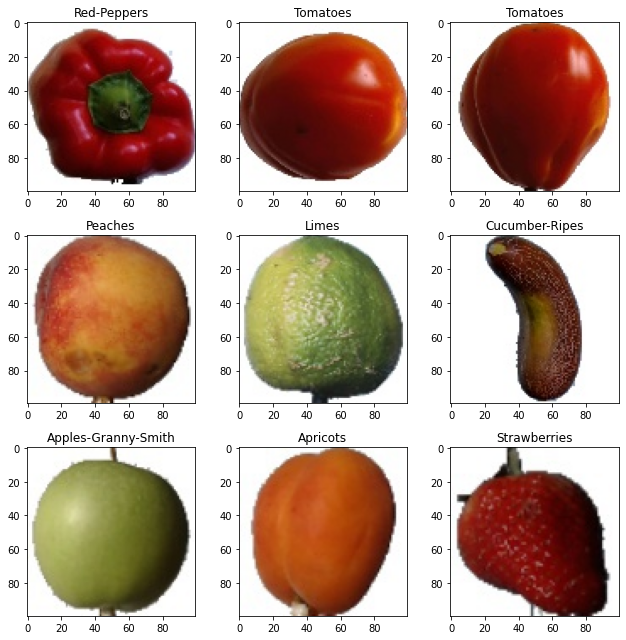

In [12]:
IMAGE_SIZE1 = 100
labels1 = ['Apples-Braeburn', 'Apples-Granny-Smith', 'Apricots',
          'Clementines','Corns', 'Cucumber-Ripes',
          'Green-Peppers', 'Kiwis', 'Lemons',
          'Limes', 'Mangos', 'Onions',
          'Oranges', 'Peaches', 'Pears',
          'Pineapples', 'Red-Peppers', 'Strawberries',
          'Tomatoes', 'Watermelons']

x_train1, y_train1 = load_data(path1, labels1, _imagesize=IMAGE_SIZE1)
x_val1, y_val1 = load_data(path1, labels1, _dataset='validation', _imagesize=IMAGE_SIZE1)
x_simpleTest, y_simpleTest = load_data(path1, labels1, _dataset='simple-test', _imagesize=IMAGE_SIZE1)

plot_random_images(x_train1, y_train1, labels1)

<b>Lancement de l'entraînement</b>

In [13]:
# Objet permettant d'augmenter davantage la taille de la base de données.
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow(x_train1, y_train1)
val_generator = train_datagen.flow(x_val1, y_val1)

model1 = BasicConvolutionalNetwork(len(labels1), IMAGE_SIZE1)

model1.build(input_shape=(None, IMAGE_SIZE1, IMAGE_SIZE1, 3))
model1.summary()
model1.compile(loss='sparse_categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=1e-4),
               metrics=['sparse_categorical_accuracy'])

history = model1.fit(train_generator, 
                     validation_data=val_generator,
                     epochs=10)

Model: "basic_convolutional_network_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           multiple                  896       
                                                                 
 conv2d_5 (Conv2D)           multiple                  18496     
                                                                 
 conv2d_6 (Conv2D)           multiple                  54238     
                                                                 
 conv2d_7 (Conv2D)           multiple                  108416    
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         multiple                  0         
                                     

<b>Analyse post-entraînement</b>
- <b>Prédiction de la classe</b> éventuelle d'une image test prise aléatoirement dans la base de donnée.
- <b>Evalutation du modèle</b> dans sa globalité.
- *(Affichage éventuel des prédictions râtées.)*

PREDICTIONS sur la donnée n°832/1487
     Apples-Braeburn -> 0.00%
     Apples-Granny-Smith -> 0.00%
     Apricots -> 0.00%
     Clementines -> 0.00%
     Corns -> 0.00%
     Cucumber-Ripes -> 0.00%
     Green-Peppers -> 0.00%
     Kiwis -> 0.00%
     Lemons -> 0.00%
     Limes -> 0.00%
     Mangos -> 0.00%
     Onions -> 0.00%
     Oranges -> 100.00%
     Peaches -> 0.00%
     Pears -> 0.00%
     Pineapples -> 0.00%
     Red-Peppers -> 0.00%
     Strawberries -> 0.00%
     Tomatoes -> 0.00%
     Watermelons -> 0.00%

RESULTAT : Oranges / 100.00%
ATTENDU  : Oranges


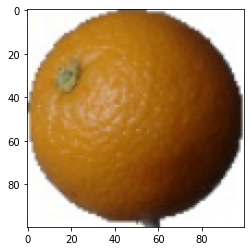

In [14]:
test_data(model1, labels1, x_simpleTest, y_simpleTest)

EVALUATION DU MODELE basic_convolutional_network_1
149/149 [==============================] - 2s 14ms/step - loss: 2.1196 - sparse_categorical_accuracy: 0.9301
LOSS     : 2.12
ACCURACY : 93.01%


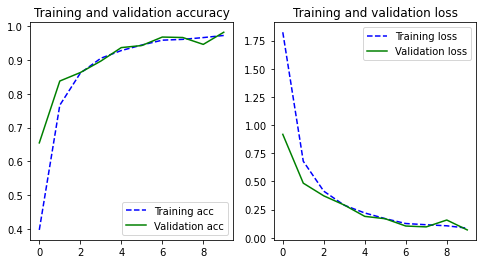

In [15]:
print("EVALUATION DU MODELE " + model1.name)
loss_and_metrics = model1.evaluate(x_simpleTest, y_simpleTest, batch_size=10)
print("LOSS     : {0:.2f}".format(loss_and_metrics[0]))
print("ACCURACY : {0:.2f}%".format(loss_and_metrics[1] * 100))

plot_training_analysis(history, 'sparse_categorical_accuracy')

In [16]:
#print_false_values(model1, labels1, x_simpleTest, y_simpleTest)

**Efficacité de *simple-database* sur une base de test réaliste**

In [17]:
x_realisticTest, y_realisticTest = load_data(path1, labels1, _dataset='realistic-test', _imagesize=IMAGE_SIZE1)

x_realistic-test.shape = (396, 100, 100, 3)
y_realistic-test.shape = (396, 1)



PREDICTIONS sur la donnée n°229/395
     Apples-Braeburn -> 0.00%
     Apples-Granny-Smith -> 0.00%
     Apricots -> 0.00%
     Clementines -> 0.00%
     Corns -> 0.00%
     Cucumber-Ripes -> 0.00%
     Green-Peppers -> 0.00%
     Kiwis -> 0.00%
     Lemons -> 0.00%
     Limes -> 0.00%
     Mangos -> 0.00%
     Onions -> 0.00%
     Oranges -> 100.00%
     Peaches -> 0.00%
     Pears -> 0.00%
     Pineapples -> 0.00%
     Red-Peppers -> 0.00%
     Strawberries -> 0.00%
     Tomatoes -> 0.00%
     Watermelons -> 0.00%

RESULTAT : Oranges / 100.00%
ATTENDU  : Oranges


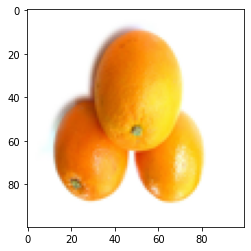

In [18]:
test_data(model1, labels1, x_realisticTest, y_realisticTest)

In [31]:
print("EVALUATION DU MODELE " + model1.name)
loss_and_metrics = model1.evaluate(x_realisticTest, y_realisticTest, batch_size=10)
print("LOSS     : {0:.2f}".format(loss_and_metrics[0]))
print("ACCURACY : {0:.2f}%".format(loss_and_metrics[1] * 100))

EVALUATION DU MODELE basic_convolutional_network_1
40/40 [==============================] - 1s 25ms/step - loss: 17.2847 - sparse_categorical_accuracy: 0.2601
LOSS     : 17.28
ACCURACY : 26.01%


Notez que la base de données est bien mauvaise pour prédire la classe d'une image plus réaliste, plus complexe qu'un unique fruit sur fond blanc. Il vient donc l'idée d'élaborer une base de données réaliste dans un premier temps, puis hybride.

# **Partie 2** : realistic-database

**Paramètres de la base de données**

x_train.shape = (2922, 100, 100, 3)
y_train.shape = (2922, 1)

x_validation.shape = (600, 100, 100, 3)
y_validation.shape = (600, 1)

x_test.shape = (588, 100, 100, 3)
y_test.shape = (588, 1)



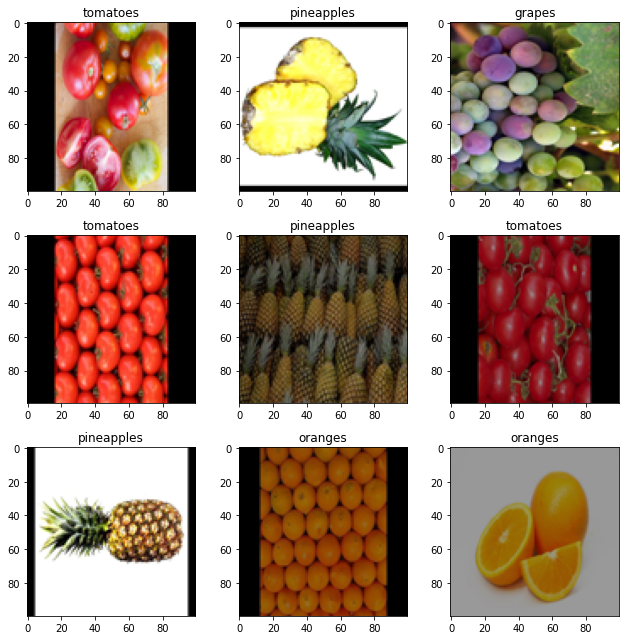

In [20]:
IMAGE_SIZE2 = 100
labels2 = ['apples', 'bananas', 'coconuts', 'grapes','lemons',
           'limes', 'mangos', 'oranges', 'pineapples', 'tomatoes']

x_train2, y_train2 = load_data(path2, labels2, _imagesize=IMAGE_SIZE2)
x_val2, y_val2 = load_data(path2, labels2, _dataset='validation', _imagesize=IMAGE_SIZE2)
x_test2, y_test2 = load_data(path2, labels2, _dataset='test', _imagesize=IMAGE_SIZE2)

plot_random_images(x_train2, y_train2, labels2)

**Lancement de l'entraînement**

In [21]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow(x_train2, y_train2)
val_generator = train_datagen.flow(x_val2, y_val2)

model2 = BasicConvolutionalNetwork(len(labels2), IMAGE_SIZE2)

model2.build(input_shape=(None, IMAGE_SIZE2, IMAGE_SIZE2, 3))
model2.summary()
model2.compile(loss='sparse_categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=1e-4),
               metrics=['sparse_categorical_accuracy'])

history = model2.fit(train_generator, 
                     validation_data=val_generator,
                     epochs=10)

Model: "basic_convolutional_network_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           multiple                  896       
                                                                 
 conv2d_9 (Conv2D)           multiple                  18496     
                                                                 
 conv2d_10 (Conv2D)          multiple                  54238     
                                                                 
 conv2d_11 (Conv2D)          multiple                  108416    
                                                                 
 max_pooling2d_2 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         multiple                  0         
                                     

<b>Analyse post-entraînement</b>

PREDICTIONS sur la donnée n°495/587
     apples -> 0.00%
     bananas -> 0.00%
     coconuts -> 0.04%
     grapes -> 0.05%
     lemons -> 0.00%
     limes -> 0.01%
     mangos -> 0.00%
     oranges -> 0.00%
     pineapples -> 99.90%
     tomatoes -> 0.00%

RESULTAT : pineapples / 99.90%
ATTENDU  : pineapples


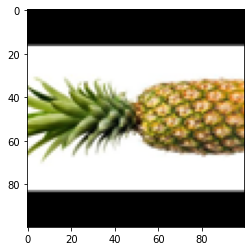

In [22]:
test_data(model2, labels2, x_test2, y_test2)

EVALUATION DU MODELE basic_convolutional_network_2
59/59 [==============================] - 1s 14ms/step - loss: 0.6438 - sparse_categorical_accuracy: 0.6854
LOSS     : 0.64
ACCURACY : 68.54%


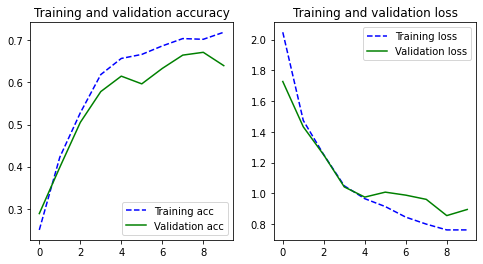

In [23]:
print("EVALUATION DU MODELE " + model2.name)
loss_and_metrics = model2.evaluate(x_test2, y_test2, batch_size=10)
print("LOSS     : {0:.2f}".format(loss_and_metrics[0]))
print("ACCURACY : {0:.2f}%".format(loss_and_metrics[1] * 100))

plot_training_analysis(history, 'sparse_categorical_accuracy')

In [24]:
#print_false_values(model2, labels2, x_test2, y_test2)

# **Partie 3** : hybrid-database

**Paramètres de la base de données**

x_train.shape = (6418, 100, 100, 3)
y_train.shape = (6418, 1)

x_validation.shape = (1164, 100, 100, 3)
y_validation.shape = (1164, 1)

x_test.shape = (898, 100, 100, 3)
y_test.shape = (898, 1)



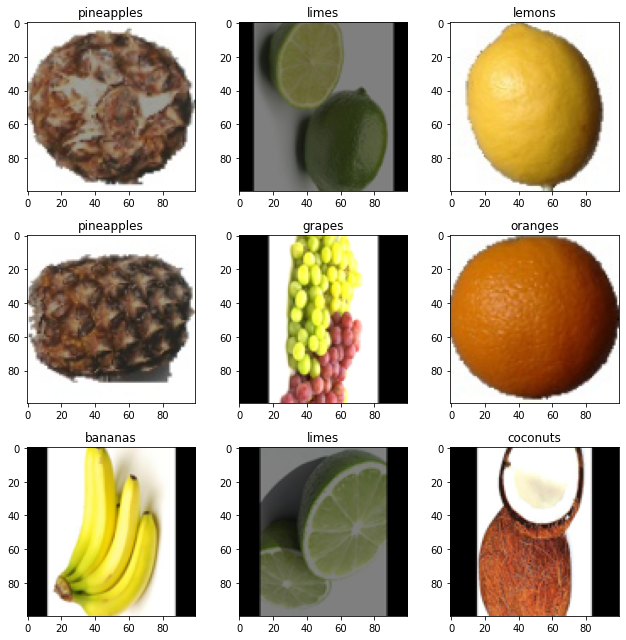

In [25]:
IMAGE_SIZE3 = 100
labels3 = ['apples', 'bananas', 'coconuts', 'grapes','lemons',
           'limes', 'mangos', 'oranges', 'pineapples', 'tomatoes']

x_train3, y_train3 = load_data(path3, labels3, _imagesize=IMAGE_SIZE3)
x_val3, y_val3 = load_data(path3, labels3, _dataset='validation', _imagesize=IMAGE_SIZE3)
x_test3, y_test3 = load_data(path3, labels3, _dataset='test', _imagesize=IMAGE_SIZE3)

plot_random_images(x_train3, y_train3, labels3)

**Lancement de l'entraînement**

In [26]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow(x_train3, y_train3)
val_generator = train_datagen.flow(x_val3, y_val3)

model3 = BasicConvolutionalNetwork(len(labels3), IMAGE_SIZE3)

model3.build(input_shape=(None, IMAGE_SIZE3, IMAGE_SIZE3, 3))
model3.summary()
model3.compile(loss='sparse_categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=1e-4),
               metrics=['sparse_categorical_accuracy'])

history = model3.fit(train_generator, 
                     validation_data=val_generator,
                     epochs=10)

Model: "basic_convolutional_network_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          multiple                  896       
                                                                 
 conv2d_13 (Conv2D)          multiple                  18496     
                                                                 
 conv2d_14 (Conv2D)          multiple                  54238     
                                                                 
 conv2d_15 (Conv2D)          multiple                  108416    
                                                                 
 max_pooling2d_3 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         multiple                  0         
                                     

<b>Analyse post-entraînement</b>

PREDICTIONS sur la donnée n°161/897
     apples -> 0.00%
     bananas -> 97.72%
     coconuts -> 0.00%
     grapes -> 0.00%
     lemons -> 1.96%
     limes -> 0.00%
     mangos -> 0.16%
     oranges -> 0.04%
     pineapples -> 0.12%
     tomatoes -> 0.00%

RESULTAT : bananas / 97.72%
ATTENDU  : bananas


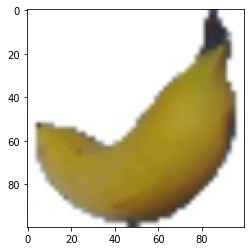

In [27]:
test_data(model3, labels3, x_test3, y_test3)

EVALUATION DU MODELE basic_convolutional_network_3
90/90 [==============================] - 2s 16ms/step - loss: 0.4790 - sparse_categorical_accuracy: 0.8207
LOSS     : 0.48
ACCURACY : 82.07%


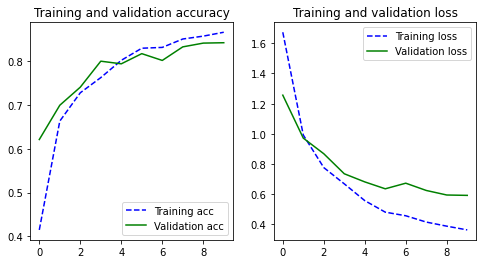

In [28]:
print("EVALUATION DU MODELE " + model3.name)
loss_and_metrics = model3.evaluate(x_test3, y_test3, batch_size=10)
print("LOSS     : {0:.2f}".format(loss_and_metrics[0]))
print("ACCURACY : {0:.2f}%".format(loss_and_metrics[1] * 100))

plot_training_analysis(history, 'sparse_categorical_accuracy')

In [29]:
#print_false_values(model3, labels3, x_test, y_test)

# **Analyse des résultats**

*simple-database* affiche une précision de l'ordre de 90 à 93%, *realistic-database* une précision de 65 à 70%, et *hybrid-database* une précision de 75 à 85%.

Qu'en conclure ?

- Les résultats de la première BD sont très bons car une photo se présente toujours sous la forme d'un fruit sur fond blanc. Il est donc aisé pour le modèle d'apprendre la forme et la couleur du fruit. En revanche, la BD se montre assez mauvaise pour classifier des images de fruits plus réalistes, d'où l'idée d'élaborer une base de données réaliste puis hybride.
- Dans la deuxième BD, les choses se compliquent. Les fruits sont rarement seuls, parfois ils sont coupés en deux, et souvent ils sont posés sur une table, ce qui change du simple fond blanc. En terme de couleur, il y a beaucoup plus d'informations, en terme de forme, c'est plus délicat aussi, et désormais l'intérieur du fruit compte. Il y a plus d'informations à gérer, donc statistiquement cela se traduit par une précision plus faible.
- Partant de là, nous décidâmes d'élaborer une approche hybride, et de construire une BD intégrant des éléments de la première et de la deuxième. Le but étant, à la fois de mémoriser au mieux la forme et la couleur de chaque fruit, et de pouvoir corréler ces informations à un contexte plus réaliste. Le résultat, s'il n'est pas transcendant (le trop plein d'informations l'oblige), demeure convenable.

# **Annexe** : Quels fruits sont-ils ?

*Les candidats à l'élection maraîchère de 2022 se prêtent à l'exercice...*

x_election-test.shape = (12, 100, 100, 3)
y_election-test.shape = (12, 1)



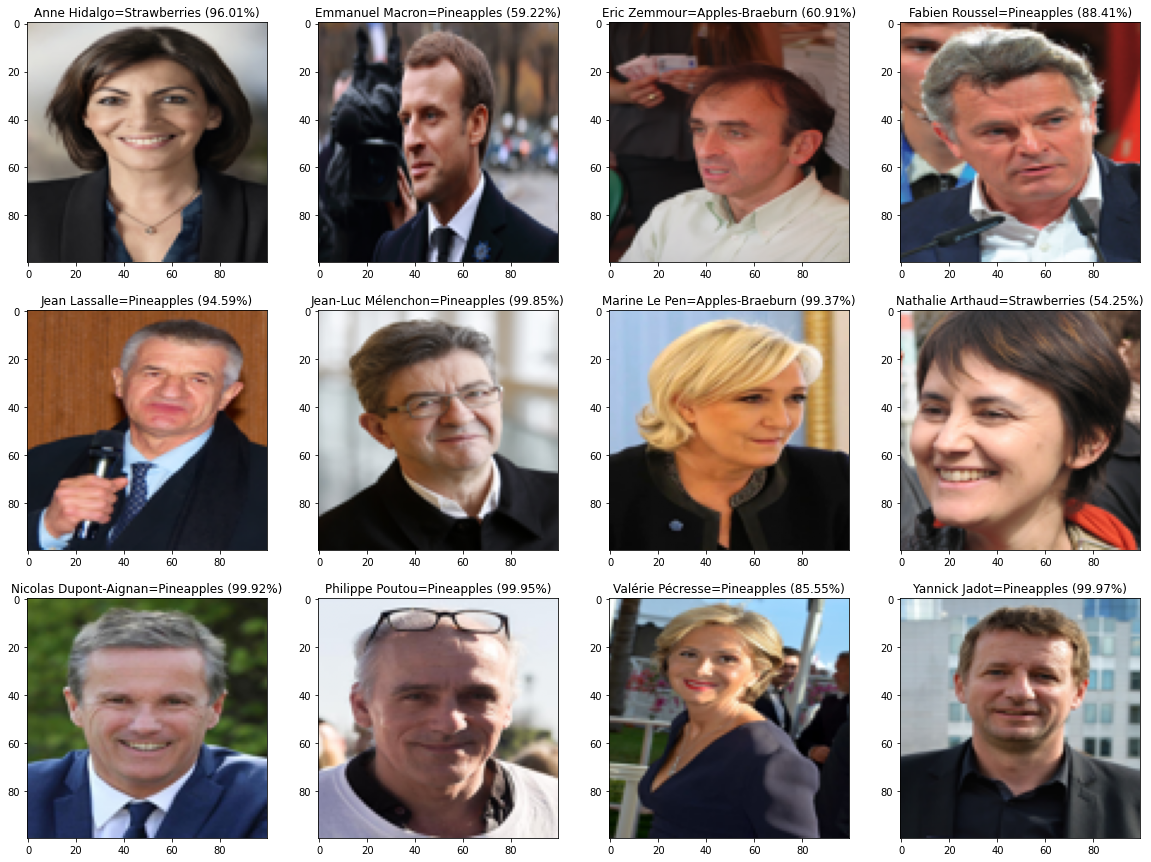

In [30]:
x_electionTest, _ = load_data(path1, labels1, _dataset="election-test", _imagesize=IMAGE_SIZE1)
plot_candidates(model1, labels1, x_electionTest)